## Sales Analysis

#### Import Necessary Libraries


In [1]:
import pandas as pd
import os

#### Task #1: Merging 12 months of sales data into a single file

In [2]:
df = pd.read_csv('./Sales_Data/Sales_April_2019.csv')




files = [file for file in os.listdir('./Sales_Data') ]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv('./Sales_Data/' + file)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.to_csv('all_data.csv', index=False)


#### Read in updated dataframe

In [3]:
all_data = pd.read_csv('all_data.csv')
print(all_data.head())

  Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
1      NaN                         NaN              NaN        NaN   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001  
1             NaN                                   NaN  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  


### Clean up the Data

##### Drop rows of Nan

In [4]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


##### Find 'Or' and delete it

In [5]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or'] 


##### Convert columns to the correct type

In [6]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) #Make int
all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) #Make float

### Augment data with additional columns

#### Task #2: Add Month Column

In [7]:

all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('Int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Task #3: Add a sales column

In [8]:
all_data['sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Task #4: Add a city column

In [9]:
# Let's use the .apply() 
def get_city(address):
    return address.split(',')[1] + ' ' + address.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x))
all_data['City'].head(10)

0             Dallas TX
2             Boston MA
3        Los Angeles CA
4        Los Angeles CA
5        Los Angeles CA
6      San Francisco CA
7            Seattle WA
8            Atlanta GA
9      San Francisco CA
10            Boston MA
Name: City, dtype: object

#### Question 1: What was the best month for sales? How much was earned that month?

In [10]:
results = all_data.groupby('Month').sum()

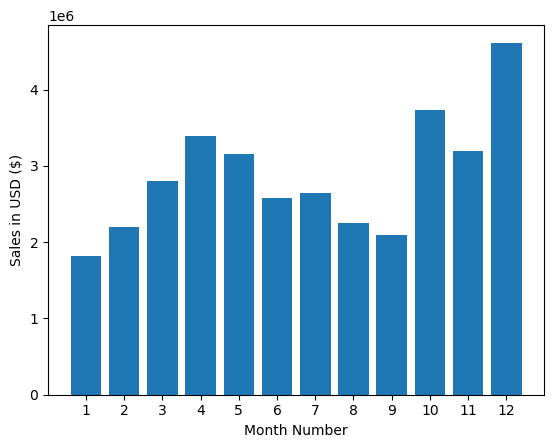

In [11]:
import matplotlib.pyplot as plt
months = range(1, 13)


plt.bar(months, results['sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month Number')
plt.show()

#### Question 2: What city had the highest number of sales?

In [12]:
results = all_data.groupby('City').sum()

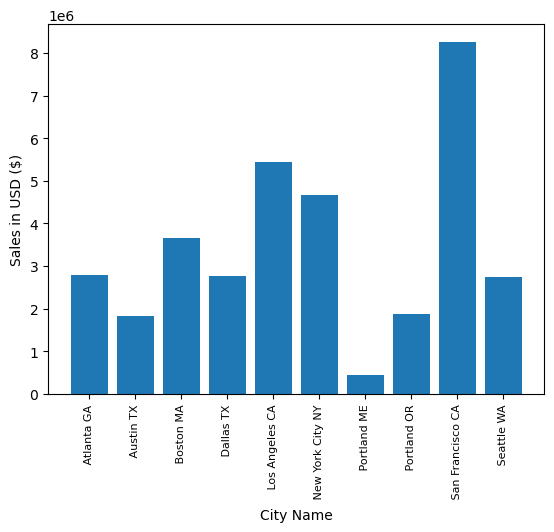

In [13]:
import matplotlib.pyplot as plt
cities = [city for city, df in all_data.groupby('City')]


plt.bar(cities, results['sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City Name')
plt.show()

#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [14]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

C:\Users\U-ser\AppData\Local\Temp\ipykernel_16424\3842191188.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])


In [15]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27


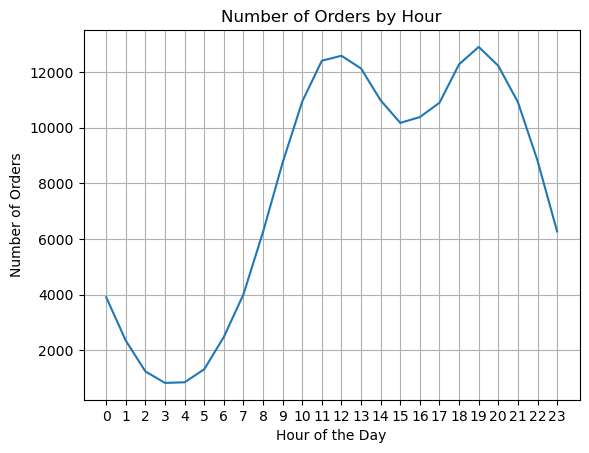

In [16]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby(['Hour']).count()['Order ID'])
plt.xticks(hours)
plt.grid()
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Hour')
plt.show()

# My recommendation for the best time to display advertisements is around 11am (11) or 7pm (19) based on the data analysis.



#### Question 4: What products are most often sold together?

In [ ]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))

df = df[['Order ID', 'Grouped']].drop_duplicates()

df.head()


C:\Users\U-ser\AppData\Local\Temp\ipykernel_16424\383680871.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [ ]:
from itertools import combinations
from collections import Counter

# Initialize a Counter object to count occurrences of product combinations
count = Counter()

# Iterate through each row in the 'Grouped' column of the dataframe
for row in df['Grouped']:
    # Split the products in the row into a list
    row_list = row.split(',')
    # Update the Counter with all 2-product combinations from the list
    count.update(Counter(combinations(row_list, 2)))

# Print the 10 most common product combinations along with their counts
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### Question 5: What product sold the most? Why do you think it sold the most?

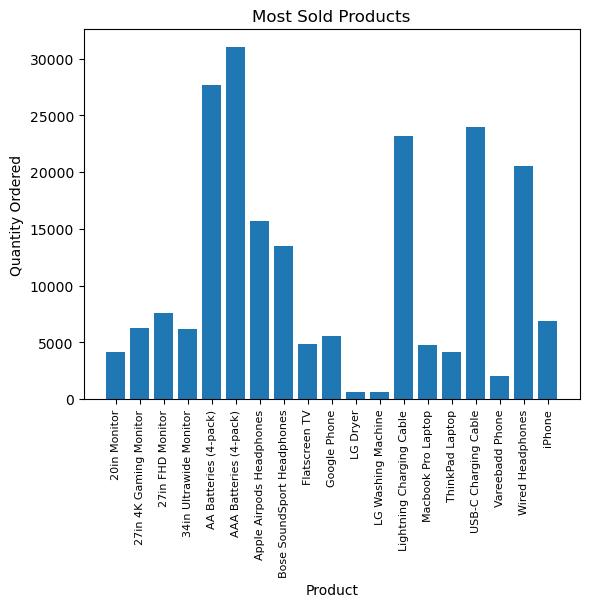

In [ ]:
# Group the data by 'Product' to analyze sales for each product
product_group = all_data.groupby('Product')

# Calculate the total quantity ordered for each product
quantity_ordered = product_group.sum(numeric_only=True)['Quantity Ordered']

# Create a list of product names for the x-axis of the plot
products = [product for product, df in product_group]

# Plot a bar chart to visualize the quantity ordered for each product
plt.bar(products, quantity_ordered)

# Add a label for the y-axis
plt.ylabel('Quantity Ordered')

# Add a label for the x-axis
plt.xlabel('Product')

# Rotate the x-axis labels vertically for better readability
plt.xticks(products, rotation='vertical', size=8)

# Add a title to the plot
plt.title('Most Sold Products')

# Display the plot
plt.show()

C:\Users\U-ser\AppData\Local\Temp\ipykernel_16424\3401905141.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(products, rotation='vertical', size=8)


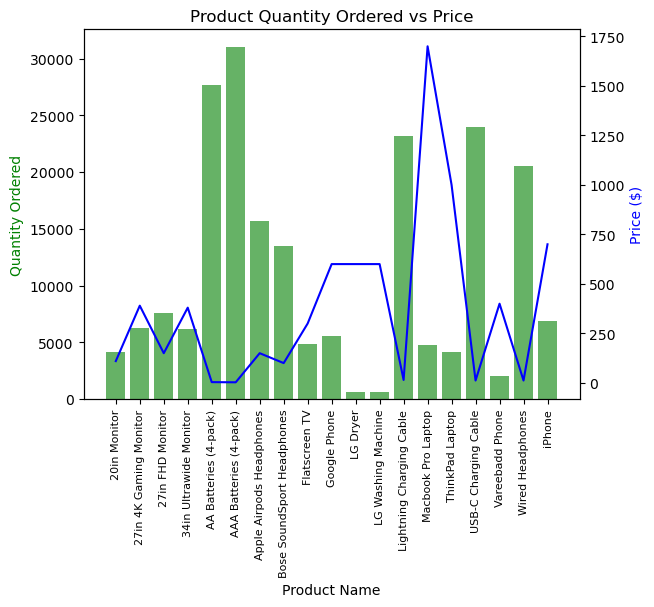

In [38]:
# Calculate the average price of each product
prices = all_data.groupby('Product').mean(numeric_only=True)['Price Each']

# Create a figure and two axes for the plot
fig, ax1 = plt.subplots()

# Create a secondary y-axis that shares the same x-axis
ax2 = ax1.twinx()

# Plot the quantity ordered as a bar chart on the primary y-axis
ax1.bar(products, quantity_ordered, color='g', alpha=0.6)

# Plot the average price as a line chart on the secondary y-axis
ax2.plot(products, prices, 'b-')

# Set the x-axis label
ax1.set_xlabel('Product Name')

# Set the y-axis label for the primary axis (quantity ordered)
ax1.set_ylabel('Quantity Ordered', color='g')

# Set the y-axis label for the secondary axis (price)
ax2.set_ylabel('Price ($)', color='b')

# Rotate the x-axis labels for better readability
ax1.set_xticklabels(products, rotation='vertical', size=8)

# Set the title of the plot
ax1.set_title('Product Quantity Ordered vs Price')

# Display the plot
plt.show()

